**Hi Myself, Pranav Kumbhar**

**About Project:**
Analyzing unemployment due to COVID-19 involves examining data on job losses, understanding the sectors most affected, and identifying demographic groups that were disproportionately impacted. Key steps include preprocessing it to handle missing values and standardize formats, and performing exploratory data analysis (EDA) to visualize trends and patterns. Commonly used metrics include unemployment rates, labor force participation rates, and sector-specific job loss figures.  Visualization tools like `matplotlib` and `seaborn`, along with statistical libraries like `pandas` and `numpy`, are instrumental in conducting and presenting this analysis.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly .express as px


In [27]:
#Loading the dataset
data = pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [28]:
#checking dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [29]:
#describing the dataset
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [30]:
#checking null/missing values
data.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [31]:
#renaming columns
data.columns = ['States','Date','Frequency','Estimated Unemployment Rate',
                'Estimated Employed','Estimated Labour Participation Rate',
                'Region','Longitude','Latitude']

In [32]:
#Analysing top rows of dataset
data.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,Longitude,Latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


**CHECKING THE CORRELATION BETWEEN THE FEATURE OF DATASET**

<ipython-input-33-36a84c23f5d6>:7: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



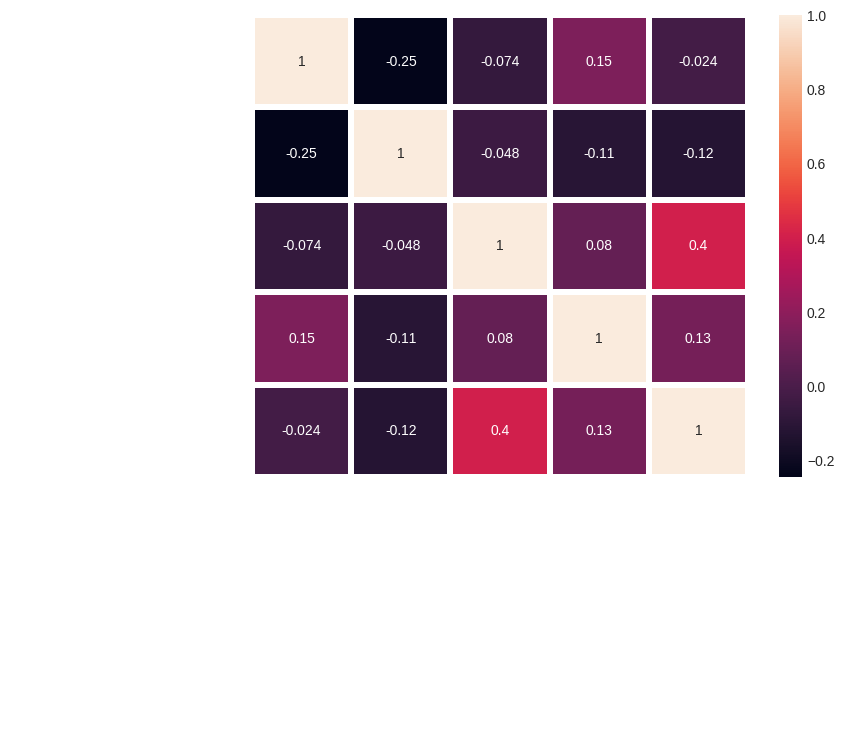

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation
numerical_data = data.select_dtypes(include=['float', 'int'])

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8,6))

#Compute the correlation matrix and plot the heatmap
ax = sns.heatmap(numerical_data.corr(), annot=True, linewidth=3)
#set tick parameters
ax.tick_params(size=10, color='w', labelsize=10, labelcolor='w')

plt.show()

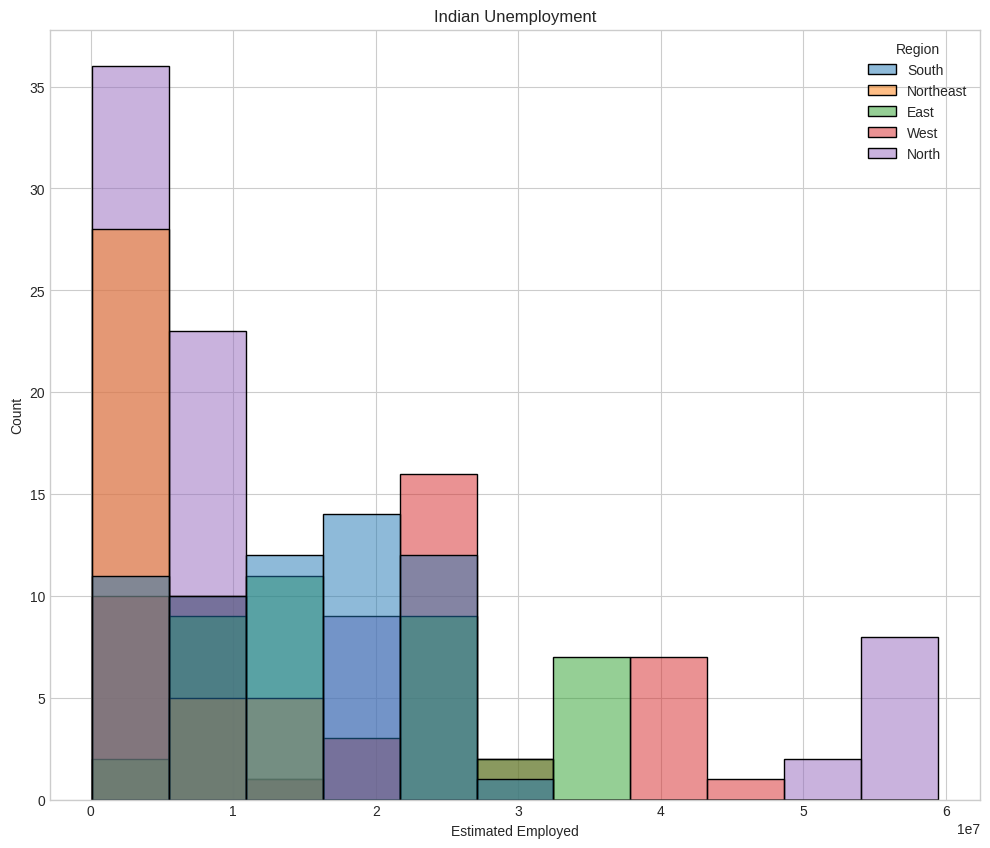

In [34]:
#plotting histplot

data.columns = ['States','Date','Frequency','Estimated Unemployment Rate',
                'Estimated Employed','Estimated Labour Participation Rate',
                'Region','Longitude','Latitude']
plt.figure(figsize=(12, 10))
plt.title("Indian Unemployment")
sns.histplot(x='Estimated Employed', hue="Region", data=data)
plt.show()

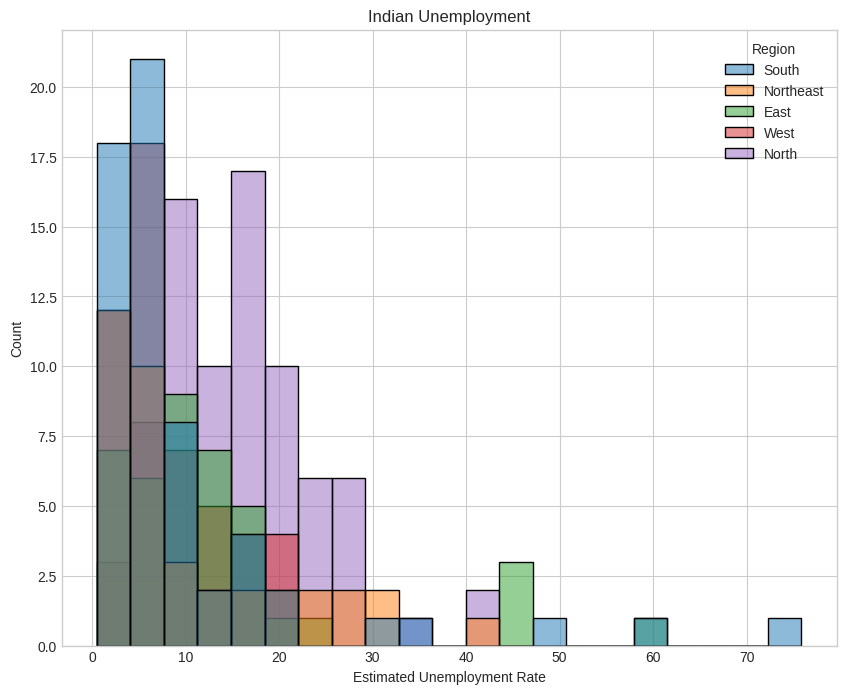

In [35]:
#plotting histplot

plt.figure(figsize=(10,8))
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Unemployment Rate", hue="Region", data=data)
plt.show()

In [36]:
#plotting sunburst

unemployment = data[['States','Region','Estimated Unemployment Rate']] # Use a list to select multiple columns
figure = px.sunburst(unemployment,path=['Region','States'],
                     values='Estimated Unemployment Rate',
                     width=700,height=600, color_continuous_scale='RdY1Gn',
                     title="Unemployment Rate in India")
figure.show()